## NLP & Binary Classification: Twitter Global Warming sentiment data
https://www.crowdflower.com/data-for-everyone/

** Dataset Information: **

- 6090 tweets for belief in the existence of global warming or climate change. “Yes” if the tweet suggests global warming is occurring, “No” if not occurring, 

** Attribute Information:**

- tweet                   
- existence             
- existence.confidence                   

** Objective of this project **

predict global warming sentiment (Yes or no) from tweets

# Data

In [56]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
# Load Data
df = pd.read_csv('1377884570_tweet_global_warming.csv', encoding='latin')
pd.set_option('display.max_colwidth', -1)
df.head()

,tweet,existence,existence.confidence
0,"Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. [link]",Yes,1.0000
1,Fighting poverty and global warming in Africa [link],Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to reduce global warming [link],Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to reduce global warming [link],Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerable to Climate Change [link],Yes,0.8087


In [58]:
df.tail()

,tweet,existence,existence.confidence
6085,"@bloodless_coup ""The phrase 'global warming' should be abandoned in favor of 'climate change', Luntz says,"" http://bit.ly/7bIY0c #p2 #tcot",Y,1.0000
6086,Virginia to Investigate Global Warming Scientist Mann: http://bit.ly/aDlavg,NaN,1.0000
6087,Global warming you tube parody you will enjoy #IPCC #ocra http://bit.ly/bBGWhC,N,0.6411
6088,One-Eyed Golfer: Don't dare tell me about global warming: Twenty-five of the forty-nine golfers making the cut thi... http://bit.ly/akeAxp,N,1.0000
6089,man made global warming a hair brained theory 4 the scientifically challenged the IPPC has nothing to back up claims #tcot #p2 #climategate,N,1.0000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6090 entries, 0 to 6089
Data columns (total 3 columns):
tweet                   6090 non-null object
existence               4225 non-null object
existence.confidence    6087 non-null float64
dtypes: float64(1), object(2)
memory usage: 142.8+ KB


In [60]:
df.describe()

,existence.confidence
count,6087.000000
mean,0.794478
std,0.180054
min,0.334600
25%,0.658500
50%,0.707600
75%,1.000000
max,1.000000


## Exploratory Data Analysis (EDA)

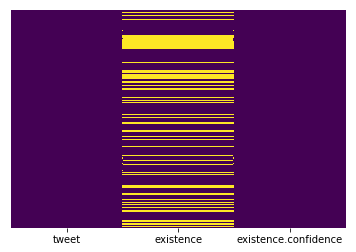

In [61]:
# missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [62]:
df[df['existence'].isnull()].head()

,tweet,existence,existence.confidence
14,Spring storm season starting a little late this year??? Must be global warming!,NaN,1.0000
34,I truly Fat ASS Gore should get the Scam Artist Award of the decade with his Global Warming and Energy Credits worth close to Billion.,NaN,NaN
40,Air ban led by flawed computer models. Global warming come to mind? [link],NaN,NaN
47,"Despite Climategate, LEFT investing heavily in global warming hysteria as new way 2 impose nat'l & international controls on human freedom.",NaN,NaN
48,Global warming you tube explanation you will enjoy #IPCC #teaparty [link],NaN,0.8485


In [63]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 4 columns):
index                   4225 non-null int64
tweet                   4225 non-null object
existence               4225 non-null object
existence.confidence    4225 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.1+ KB


Y      2554
N      1053
Yes    557 
No     61  
Name: existence, dtype: int64

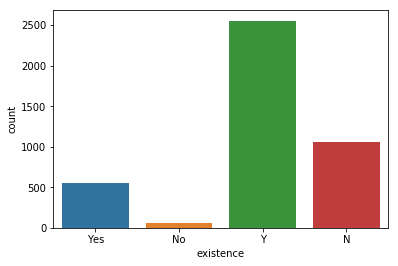

In [64]:
# inspect sentiment
sns.countplot(df['existence'])
df['existence'].value_counts() #imbalanced

In [65]:
# create new 'class' column
dict_class = {'Y':1, 'Yes':1, 'No':0, 'N':0}
df['class'] = df['existence'].map(dict_class)
df[['existence','class']].tail()

,existence,class
4220,Y,1
4221,Y,1
4222,N,0
4223,N,0
4224,N,0


1    3111
0    1114
Name: class, dtype: int64

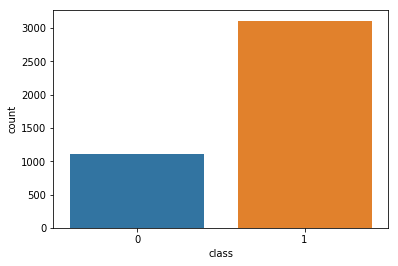

In [66]:
sns.countplot(df['class'])
df['class'].value_counts()

In [67]:
# feature engineering, tweet length
df['tweet_length'] = df['tweet'].apply(len)
df[['class','tweet_length','tweet']].head()

,class,tweet_length,tweet
0,1,118,"Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. [link]"
1,1,52,Fighting poverty and global warming in Africa [link]
2,1,75,Carbon offsets: How a Vatican forest failed to reduce global warming [link]
3,1,75,Carbon offsets: How a Vatican forest failed to reduce global warming [link]
4,1,72,URUGUAY: Tools Needed for Those Most Vulnerable to Climate Change [link]


In [68]:
df['tweet_length'].describe()

count    4225.000000
mean     111.799763 
std      27.101025  
min      21.000000  
25%      91.000000  
50%      120.000000 
75%      137.000000 
max      161.000000 
Name: tweet_length, dtype: float64

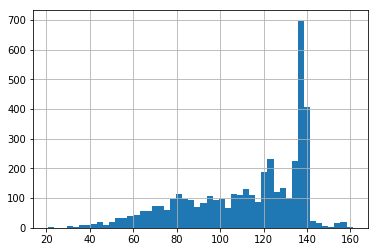

In [69]:
df['tweet_length'].hist(bins=50)

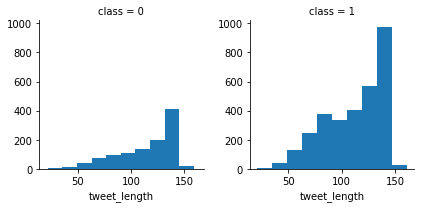

In [70]:
g = sns.FacetGrid(df,col='class')
g.map(plt.hist,'tweet_length')

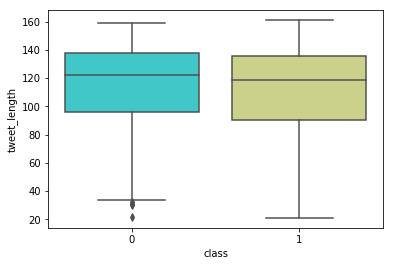

In [71]:
sns.boxplot(x='class',y='tweet_length',data=df,palette='rainbow')

## Data Preprocessing

** Clean text **

In [72]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

corpus = []
for i in range(0, len(df)):
    #remove '[link]'
    text = re.sub('\[link]', '', df['tweet'][i]) 
    #remove urls
    text = re.sub(r'http\S+', '', text) 
    #remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', text) 
    #lowercase, split to words
    text = text.lower().split() 
    #stemming, remove stopwords, RT and VIA
    ps = PorterStemmer() 
    text = [ps.stem(word) for word in text 
            if not word in set(stopwords.words('english')+['rt','via'])]
    #rejoin to text
    text = ' '.join(text) 
    corpus.append(text)

In [73]:
#i=0
#print(df['tweet'][i])
#print(corpus[i])

** Creat Bag-Of-Words model **

In [74]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv = CountVectorizer()#max_features = 3000) 
bow = cv.fit_transform(corpus) #bag-og-words
X = TfidfTransformer().fit_transform(bow) #tf-idf scoring
y = df['class'].values
print(X.shape,y.shape)

(4225, 5924) (4225,)


In [75]:
#cv.vocabulary_

#### Split Train Test sets

In [76]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3380, 5924) (845, 5924) (3380,) (845,)


In [78]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array([0, 1], dtype=int64), array([ 891, 2489], dtype=int64))

## Model Train

Accuracy: 99.1%


             precision    recall  f1-score   support

          0       0.99      0.98      0.98       891
          1       0.99      1.00      0.99      2489

avg / total       0.99      0.99      0.99      3380



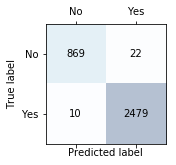

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

#accuracy score
y_pred_train = model.predict(X_train)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_train,y_pred_train)*100))

#classification report
print('\n')
print(classification_report(y_train, y_pred_train))

#confusion matrix
confmat = confusion_matrix(y_train, y_pred_train)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xticks((0,1), ('No', 'Yes'))
plt.yticks((0,1), ('No', 'Yes'))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Model Evaluation with Test set

Accuracy: 83.7%


             precision    recall  f1-score   support

          0       0.80      0.51      0.62       223
          1       0.84      0.95      0.90       622

avg / total       0.83      0.84      0.82       845



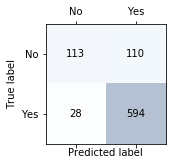

In [80]:
# predict class with test set (new, unseen)
y_pred_test = model.predict(X_test)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_test,y_pred_test)*100))

#classification report
print('\n')
print(classification_report(y_test, y_pred_test))

#confusion matrix
confmat = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xticks((0,1), ('No', 'Yes'))
plt.yticks((0,1), ('No', 'Yes'))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()